In [65]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
response = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
json = response.json()

In [3]:
elements_df = pd.DataFrame(json['elements'])
elememttypes_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [5]:
print(elements_df.columns)
# print(elememttypes_df.columns)
print(teams_df.columns)

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [18]:
teams_df_slim = teams_df[['id', 'name']]
elementtypes_df_slim = elememttypes_df[['id', 'singular_name']]

In [37]:
elements_df_merge1 = pd.merge(elements_df, elementtypes_df_slim, how="left", left_on='element_type', right_on='id')
elements_df_merge2 = pd.merge(elements_df_merge1, teams_df_slim, how='left', left_on='team', right_on='id')

In [38]:
elements_df_merge2.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,id_y,singular_name,id,name
0,NaN,NaN,80201,0,0,0,0,0,1,1.0,...,NaN,,NaN,,NaN,,1,Goalkeeper,1,Arsenal
1,0.0,0.0,115918,0,0,0,0,0,1,0.0,...,NaN,,NaN,,NaN,,1,Goalkeeper,1,Arsenal
2,50.0,50.0,47431,0,0,-1,1,0,3,-0.2,...,4.0,,2.0,,NaN,,3,Midfielder,1,Arsenal
3,100.0,50.0,54694,0,0,-1,1,0,4,0.0,...,NaN,,NaN,,1.0,,4,Forward,1,Arsenal
4,NaN,NaN,58822,0,0,0,0,0,2,0.0,...,NaN,,5.0,,NaN,,2,Defender,1,Arsenal


In [43]:
elements_df_slim = elements_df_merge2[['second_name','name', 'singular_name', 'selected_by_percent','now_cost','minutes','transfers_in', 'value_season','total_points']]

In [52]:
df = elements_df_slim.rename(columns={"name": "team", "singular_name":"pos"})

In [54]:
df.head()

,second_name,team,pos,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Leno,Arsenal,Goalkeeper,1.9,50,180,3693,0.6,3
1,Rúnarsson,Arsenal,Goalkeeper,1.4,40,0,6068,0.0,0
2,Borges Da Silva,Arsenal,Midfielder,0.2,64,0,768,0.0,0
3,Aubameyang,Arsenal,Forward,1.2,99,29,2141,0.1,1
4,Soares,Arsenal,Defender,0.2,45,90,962,0.2,1


In [115]:
top_gks = df[(df['pos'] == 'Goalkeeper') & (df['minutes'] > 0)].sort_values('total_points', ascending=False)

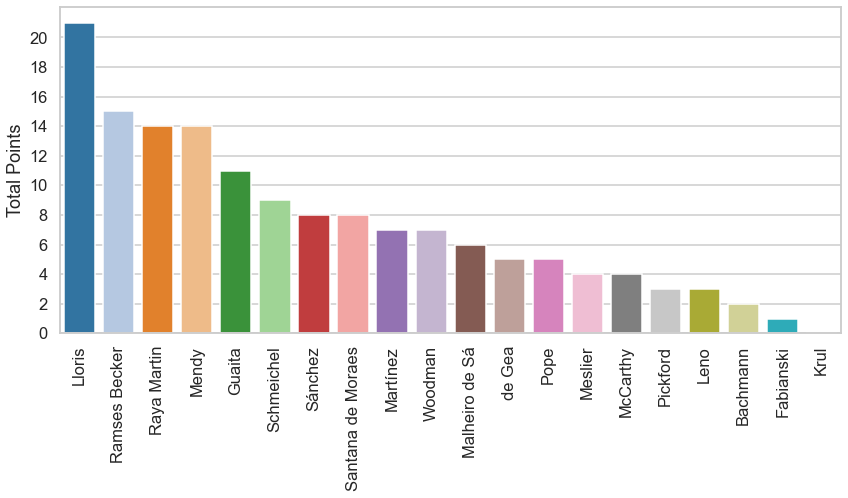

In [116]:
ax, fig = plt.subplots(figsize = (14,6))
sns.set_theme(style='whitegrid', context='talk')
sns.barplot(data = top_gks, x='second_name', y='total_points', palette=f'tab{len(top_gks)}')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Total Points')
plt.yticks(range(0, 22, 2))
plt.show()

In [145]:
def plot_top_of_pos(position = '', min_points = 1, min_minutes = 0, df=df):
  if position == '':
    letter_pos = {"G": "Goalkeeper", "D": "Defender", "M": "Midfielder", "F": "Forward"}
    letter = input('Please select position, (G, D, M or F)')
    position = letter_pos[letter]

  top_in_pos = df[(df['pos'] == position) & (df['minutes'] > min_minutes) & (df['total_points'] > min_points)].sort_values('total_points', ascending=False)
  ax, fig = plt.subplots(figsize = (14,6))
  sns.set_theme(style='whitegrid', context='talk')
  sns.barplot(data = top_in_pos, x='second_name', y='total_points')
  plt.xticks(rotation=90)
  plt.xlabel('')
  plt.ylabel('Total Points')
  plt.yticks(range(0, max(df['total_points']), 2))
  plt.show()

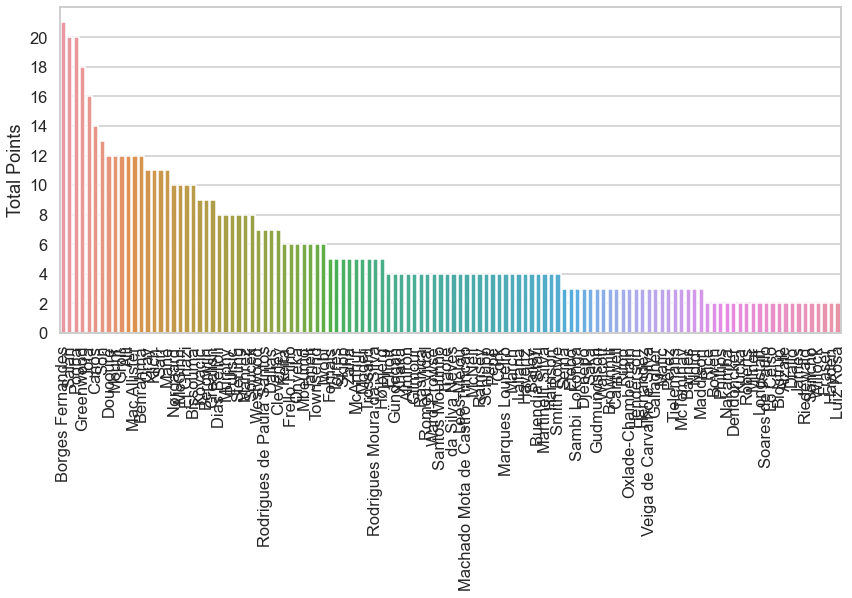

In [147]:
plot_top_of_pos()